In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [18]:
X, y = make_classification(n_samples=5000, n_classes=2, random_state=1)
#ANN SVM KNN

In [25]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
ns_probs = [0 for _ in range(len(testy))]


In [26]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
lr_probs = model.predict_proba(testX)

In [28]:
lr_probs = lr_probs[:, 1]


In [31]:
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

In [32]:
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.928


In [33]:
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

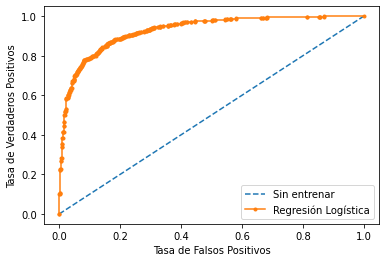

In [34]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()